<a href="https://colab.research.google.com/github/Sarthakpunj/CV/blob/main/Movie_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import json

In [2]:
a = pd.read_csv("/content/tmdb_5000_movies.csv")

In [3]:
a.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
name = a["original_title"]
keyword =a["keywords"]
genres = a["genres"]

In [7]:
print(name)

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: original_title, Length: 4803, dtype: object


In [8]:
print(genres)

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object


In [11]:
print(keyword)

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object


In [17]:
j = json.loads(a['genres'][0])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [21]:
#here we need only name attribute so we make a function that retrieves name attribute

import json
import pandas as pd

def get_name(row):
  g = json.loads(row['genres'])
  # Join the 'name' values from the 'genres' list into a single string
  # separated by spaces and assign it to the 'genres' variable
  genres = ' '.join(j['name'] for j in g)


  k = json.loads(row['keywords'])
  # Join the 'name' values from the 'keywords' list into a single string
  # separated by spaces and assign it to the 'keywords' variable
  keywords = ' '.join(j['name'] for j in k)
  return "%s %s" %(genres,keywords)

a["g_and_k_as_input"]=a.apply(get_name,axis=1)


In [22]:
a["g_and_k_as_input"]=a.apply(get_name,axis=1)

In [25]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.metrics.pairwise
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
tfidf = TfidfVectorizer() #keeps most frequent term in corpus

In [27]:
x= tfidf.fit_transform(a["g_and_k_as_input"])

In [28]:
x

<4803x7164 sparse matrix of type '<class 'numpy.float64'>'
	with 63598 stored elements in Compressed Sparse Row format>

In [32]:
mov_index = pd.Series(a.index, index=a['title'])  # this makes the movie title as index and number as value

In [33]:
mov_index

,0
title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [34]:
d =mov_index['Scream 3']
d

1164

In [37]:
query = x[d]
query

<1x7164 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [40]:
scores = cosine_similarity(query,x)
scores

array([[0.        , 0.01548139, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [41]:
scores= scores.flatten()

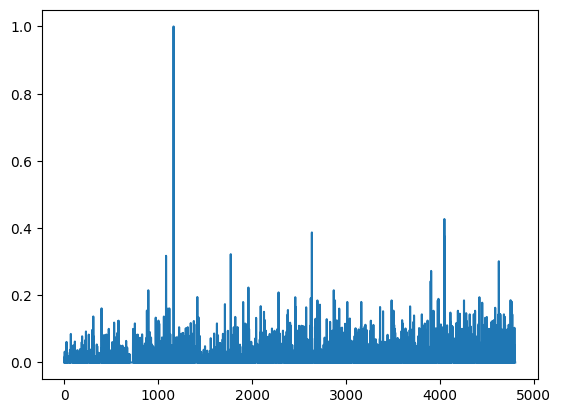

In [44]:
import matplotlib.pyplot as plt
plt.plot(scores);

In [45]:
(-scores).argsort()#sort all the scores in descending order so that we get most similar movies first

array([1164, 4048, 2637, ..., 1887, 1873, 4802])

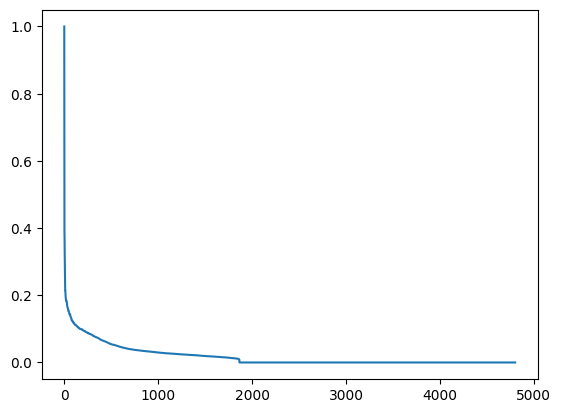

In [48]:
s =scores[(-scores).argsort()]
plt.plot(s)

In [49]:
recomm = (-scores).argsort()[1:6]

In [50]:
print(recomm)

[4048 2637 4053 1773 1084]


In [51]:
a['title'].iloc[recomm]

,title
4048,The Calling
2637,Felicia's Journey
4053,Friday the 13th: A New Beginning
1773,Mindhunters
1084,The Glimmer Man


In [57]:
#making function that takes in movie name and gives recommendation

def recomend(title,n):
  g=mov_index[title]
  q = x[g]
  score = cosine_similarity(q,x)
  score = score.flatten()
  recomm=(-score).argsort()[1:n+1]
  return a['title'].iloc[recomm]

In [59]:
print("Enter movie name you want to see recommendation for:")
title = str(input())
print("Enter number of movies you want to see recommendation for:")
n = int(input())
recomend(title,n)

Enter movie name you want to see recommendation for:
The Calling
Enter number of movies you want to see recommendation for:
7


,title
2637,Felicia's Journey
1773,Mindhunters
4053,Friday the 13th: A New Beginning
1084,The Glimmer Man
1164,Scream 3
2625,Kiss Kiss Bang Bang
2696,Jason X
